In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import zipfile

In [7]:
zip_obj = zipfile.ZipFile('/content/Plant_1_Generation_Data.csv.zip','r')

In [8]:
zip_obj.extractall('extracted_file')

In [2]:
# Plant Generation Data
df = pd.read_csv('/content/extracted_file/Plant_1_Generation_Data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/extracted_file/Plant_1_Generation_Data.csv'

In [10]:


# Plant Weather Data
df1 = pd.read_csv('/content/Plant_1_Weather_Sensor_Data.csv')

In [11]:
df.dtypes,df1.dtypes


(DATE_TIME       object
 PLANT_ID         int64
 SOURCE_KEY      object
 DC_POWER       float64
 AC_POWER       float64
 DAILY_YIELD    float64
 TOTAL_YIELD    float64
 dtype: object, DATE_TIME               object
 PLANT_ID                 int64
 SOURCE_KEY              object
 AMBIENT_TEMPERATURE    float64
 MODULE_TEMPERATURE     float64
 IRRADIATION            float64
 dtype: object)

In [12]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [70]:
df1.head()

,DATE_TIME,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.18,22.86,0.0
1,2020-05-15 00:15:00,HmiyD2TTLFNqkNe,25.08,22.76,0.0
2,2020-05-15 00:30:00,HmiyD2TTLFNqkNe,24.94,22.59,0.0
3,2020-05-15 00:45:00,HmiyD2TTLFNqkNe,24.85,22.36,0.0
4,2020-05-15 01:00:00,HmiyD2TTLFNqkNe,24.62,22.17,0.0


In [105]:
df1['SOURCE_KEY'].unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

In [23]:
df.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [13]:
# Rounding off

df = df.round(2)
df1 = df1.round(2)

### EXPLORATORY DATA ANALYSIS

In [ ]:
df.info()

In [ ]:
df1.info()

In [ ]:
df.describe()

In [ ]:
df1.describe()

In [101]:
# For Plant Generation data
print('Plant ID ',df.PLANT_ID.nunique())
print('No. of Inverters ',df.SOURCE_KEY.nunique())


Plant ID  1
No. of Inverters  22


In [102]:
# For Plant Weather data
print('Plant ID ',df1.PLANT_ID.nunique())
print('No. of Inverters ',df1.SOURCE_KEY.nunique())

Plant ID  1
No. of Inverters  1


In [14]:
# Dropping Plant ID column
df.drop('PLANT_ID',axis = 1,inplace=True)
df1.drop('PLANT_ID',axis = 1,inplace=True)

In [107]:
df1.groupby('SOURCE_KEY').count()

,DATE_TIME,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
SOURCE_KEY,,,,,
HmiyD2TTLFNqkNe,3182,3182,3182,3182,3182


We can observe that data for all inverters is not available for all the blocks. 

We need to include blocks where data for all inverters is present

In [51]:
#Checking for NaN values
df.isnull().sum()

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [94]:
df1.isnull().sum()

DATE_TIME      0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
Inverter_No    0
dtype: int64

In [12]:
df

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.00,6259559.0
1,15-05-2020 00:00,1IF53ai7Xc0U56Y,0.0,0.0,0.00,6183645.0
2,15-05-2020 00:00,3PZuoBAID5Wc2HD,0.0,0.0,0.00,6987759.0
3,15-05-2020 00:00,7JYdWkrLSPkdwr4,0.0,0.0,0.00,7602960.0
4,15-05-2020 00:00,McdE0feGgRqW7Ca,0.0,0.0,0.00,7158964.0
...,...,...,...,...,...,...
68773,17-06-2020 23:45,uHbuxQJl8lW7ozc,0.0,0.0,5967.00,7287002.0
68774,17-06-2020 23:45,wCURE6d3bPkepu2,0.0,0.0,5147.62,7028601.0
68775,17-06-2020 23:45,z9Y9gH1T5YWrNuG,0.0,0.0,5819.00,7251204.0
68776,17-06-2020 23:45,zBIq5rxdHJRwDNY,0.0,0.0,5817.00,6583369.0


In [15]:
#Removing Total yield column
df = df.iloc[:,:-1]

No missing values found in both dataframes

In [16]:
# Replacing Source Codes with numbers

Inverter_labels = {inverter_no:inverter_name for inverter_name,inverter_no in enumerate(df['SOURCE_KEY'].unique(),1)}
df['Inverter_No'] = df['SOURCE_KEY'].map(Inverter_labels) 


In [17]:
# Drop Source Key Column as we have replaced codes with inverter numbers

df.drop('SOURCE_KEY',axis=1,inplace=True)


In [18]:
df['Inverter_No'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [17]:
df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,Inverter_No
0,15-05-2020 00:00,0.0,0.0,0.0,1
1,15-05-2020 00:00,0.0,0.0,0.0,2
2,15-05-2020 00:00,0.0,0.0,0.0,3
3,15-05-2020 00:00,0.0,0.0,0.0,4
4,15-05-2020 00:00,0.0,0.0,0.0,5


In [121]:
df.columns = ['DATE_TIME','DC_POWER',	'AC_POWER',	'DAILY_YIELD',	'TOTAL_YIELD','Inverter_No']

In [19]:
#Reordering
df = df[['DATE_TIME','Inverter_No' ,'DC_POWER', 'AC_POWER', 'DAILY_YIELD']]


In [20]:
df_copy1 = df.copy()
df1_copy1 = df1.copy()

In [20]:
df.head()

,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD
0,15-05-2020 00:00,1,0.0,0.0,0.0
1,15-05-2020 00:00,2,0.0,0.0,0.0
2,15-05-2020 00:00,3,0.0,0.0,0.0
3,15-05-2020 00:00,4,0.0,0.0,0.0
4,15-05-2020 00:00,5,0.0,0.0,0.0


In [136]:
#Check if data of any inverter is missing for any block
df.groupby('Inverter_No').count()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
Inverter_No,,,,,
1,3154,3154,3154,3154,3154
2,3119,3119,3119,3119,3119
3,3118,3118,3118,3118,3118
4,3133,3133,3133,3133,3133
5,3124,3124,3124,3124,3124
6,3133,3133,3133,3133,3133
7,3118,3118,3118,3118,3118
8,3130,3130,3130,3130,3130
9,3123,3123,3123,3123,3123


In [21]:
print('Min and Max number of blocks data available for any inverter {}, {}'.format(df.groupby('Inverter_No').count().min()[0],df.groupby('Inverter_No').count().max()[0]))

Min and Max number of blocks data available for any inverter 3104, 3155


In [157]:
df.head()

,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,1,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,2,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,3,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,5,0.0,0.0,0.0,7158964.0


In [21]:
df.to_csv('df.csv')

df1.to_csv('df1.csv')


51 blocks or 13 hours data is missing for one inverter. We need to consider this while adding generation of individual inverters.

In [22]:
grouped = df.groupby('Inverter_No')

Inv_1 = grouped.get_group(1)
Inv_2 = grouped.get_group(2)
Inv_3 = grouped.get_group(3)
Inv_4 = grouped.get_group(4)
Inv_5 = grouped.get_group(5)
Inv_6 = grouped.get_group(6)
Inv_7 = grouped.get_group(7)
Inv_8 = grouped.get_group(8)
Inv_9 = grouped.get_group(9)
Inv_10 = grouped.get_group(10)
Inv_11 = grouped.get_group(11)
Inv_12 = grouped.get_group(12)
Inv_13 = grouped.get_group(13)
Inv_14 = grouped.get_group(14)
Inv_15 = grouped.get_group(15)
Inv_16 = grouped.get_group(16)
Inv_17 = grouped.get_group(17)
Inv_18 = grouped.get_group(18)
Inv_19 = grouped.get_group(19)
Inv_20 = grouped.get_group(20)
Inv_21 = grouped.get_group(21)
Inv_22 = grouped.get_group(22)


  

In [40]:
type(Inv_11)


pandas.core.frame.DataFrame

In [88]:
#pd.read_csv('df.csv')
df1 = pd.read_csv('df1.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'df1.csv'

In [39]:
#pd.set_option('display.max_rows',300)


In [23]:
dfs = [Inv_1,Inv_2,Inv_3,Inv_4,Inv_5,Inv_6,Inv_7,Inv_8,Inv_9,Inv_10,Inv_11,Inv_12,Inv_13,Inv_14,Inv_15,Inv_16,Inv_17,Inv_18,Inv_19,Inv_20,Inv_21,Inv_22]


In [24]:
# Merging data inverterwise

from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE_TIME'],
                                            how='outer'), dfs)

In [25]:
df_merged.head()

,DATE_TIME,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,...,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y,Inverter_No_x,DC_POWER_x,AC_POWER_x,DAILY_YIELD_x,Inverter_No_y,DC_POWER_y,AC_POWER_y,DAILY_YIELD_y
0,15-05-2020 00:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,15-05-2020 00:15,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,15-05-2020 00:30,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,15-05-2020 00:45,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,15-05-2020 01:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,13.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0


Copy of df_merged saved

In [26]:
df_merged_copy1 = df_merged.copy()

Interpolation for NaN values induced 


In [113]:
df_merged['Inverter_No_x'] = np.where(df_merged['Inverter_No_x'].isnull(),df_merged['Inverter_No_x'].mode(),df_merged['Inverter_No_x'])

In [117]:
df_merged.columns

Index(['DATE_TIME', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x', 'DC_POWER_x', 'AC_POWER_x',
       'DAILY_YIELD_x', 'Inverter_No_y', 'DC_POWER_y', 'AC_POWER_y',
       'DAILY_YIELD_y', 'Inverter_No_x

In [27]:
df_merged.columns = ['DATE_TIME', 'Inverter_No_1', 'DC_POWER_1', 'AC_POWER_1',
       'DAILY_YIELD_1', 'Inverter_No_2', 'DC_POWER_2', 'AC_POWER_2',
       'DAILY_YIELD_2', 'Inverter_No_3', 'DC_POWER_3', 'AC_POWER_3',
       'DAILY_YIELD_3', 'Inverter_No_4', 'DC_POWER_4', 'AC_POWER_4',
       'DAILY_YIELD_4', 'Inverter_No_5', 'DC_POWER_5', 'AC_POWER_5',
       'DAILY_YIELD_5', 'Inverter_No_6', 'DC_POWER_6', 'AC_POWER_6',
       'DAILY_YIELD_6', 'Inverter_No_7', 'DC_POWER_7', 'AC_POWER_7',
       'DAILY_YIELD_7', 'Inverter_No_8', 'DC_POWER_8', 'AC_POWER_8',
       'DAILY_YIELD_8', 'Inverter_No_9', 'DC_POWER_9', 'AC_POWER_9',
       'DAILY_YIELD_9', 'Inverter_No_10', 'DC_POWER_10', 'AC_POWER_10',
       'DAILY_YIELD_10', 'Inverter_No_11', 'DC_POWER_11', 'AC_POWER_11',
       'DAILY_YIELD_11', 'Inverter_No_12', 'DC_POWER_12', 'AC_POWER_12',
       'DAILY_YIELD_12', 'Inverter_No_13', 'DC_POWER_13', 'AC_POWER_13',
       'DAILY_YIELD_13', 'Inverter_No_14', 'DC_POWER_14', 'AC_POWER_14',
       'DAILY_YIELD_14', 'Inverter_No_15', 'DC_POWER_15', 'AC_POWER_15',
       'DAILY_YIELD_15', 'Inverter_No_16', 'DC_POWER_16', 'AC_POWER_16',
       'DAILY_YIELD_16', 'Inverter_No_17', 'DC_POWER_17', 'AC_POWER_17',
       'DAILY_YIELD_17', 'Inverter_No_18', 'DC_POWER_18', 'AC_POWER_18',
       'DAILY_YIELD_18', 'Inverter_No_19', 'DC_POWER_19', 'AC_POWER_19',
       'DAILY_YIELD_19', 'Inverter_No_20', 'DC_POWER_20', 'AC_POWER_20',
       'DAILY_YIELD_20', 'Inverter_No_21', 'DC_POWER_21', 'AC_POWER_21',
       'DAILY_YIELD_21', 'Inverter_No_22', 'DC_POWER_22', 'AC_POWER_22',
       'DAILY_YIELD_22']

In [121]:
len(df_merged.columns)

89

In [39]:
# Filling NaN Inverter no. with their numbers

for i in range(1,len(df_merged.columns),4):
  df_merged.iloc[:,i].fillna(df_merged.iloc[:,i].mode()[0],inplace=True)

In [43]:
df_merged_copy2 = df_merged.copy()

In [91]:
df = df_merged.copy()

In [92]:
df1['DATE_TIME'] = pd.to_datetime(df1['DATE_TIME'],format = '%Y-%m-%d %H:%M')
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'],format = '%d-%m-%Y %H:%M')


In [93]:
# Merging Generation data with Weather data
df = pd.merge(df,df1,on='DATE_TIME')

In [95]:

df.drop('SOURCE_KEY',axis=1,inplace=True)

In [101]:
df.to_csv('solar_df.csv')

In [4]:
df = pd.read_csv('solar_df.csv')

In [22]:
df.to_csv('solar_df.csv')

In [21]:
df.head()

,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,DAILY_YIELD_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,DAILY_YIELD_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,DAILY_YIELD_3,Inverter_No_4,DC_POWER_4,AC_POWER_4,DAILY_YIELD_4,Inverter_No_5,DC_POWER_5,AC_POWER_5,DAILY_YIELD_5,Inverter_No_6,DC_POWER_6,AC_POWER_6,DAILY_YIELD_6,Inverter_No_7,DC_POWER_7,AC_POWER_7,DAILY_YIELD_7,Inverter_No_8,DC_POWER_8,AC_POWER_8,DAILY_YIELD_8,Inverter_No_9,DC_POWER_9,AC_POWER_9,DAILY_YIELD_9,Inverter_No_10,DC_POWER_10,AC_POWER_10,...,DAILY_YIELD_13,Inverter_No_14,DC_POWER_14,AC_POWER_14,DAILY_YIELD_14,Inverter_No_15,DC_POWER_15,AC_POWER_15,DAILY_YIELD_15,Inverter_No_16,DC_POWER_16,AC_POWER_16,DAILY_YIELD_16,Inverter_No_17,DC_POWER_17,AC_POWER_17,DAILY_YIELD_17,Inverter_No_18,DC_POWER_18,AC_POWER_18,DAILY_YIELD_18,Inverter_No_19,DC_POWER_19,AC_POWER_19,DAILY_YIELD_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,DAILY_YIELD_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,DAILY_YIELD_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,DAILY_YIELD_22,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,25.18,22.86,0.0
1,2020-05-15 00:15:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,25.08,22.76,0.0
2,2020-05-15 00:30:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,24.94,22.59,0.0
3,2020-05-15 00:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,24.85,22.36,0.0
4,2020-05-15 01:00:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,14.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.62,22.17,0.0


In [104]:
pd.set_option('display.max_rows',100)
df.isnull().sum()

DATE_TIME               0
Inverter_No_1           0
DC_POWER_1              3
AC_POWER_1              3
DAILY_YIELD_1           3
Inverter_No_2           0
DC_POWER_2             39
AC_POWER_2             39
DAILY_YIELD_2          39
Inverter_No_3           0
DC_POWER_3             39
AC_POWER_3             39
DAILY_YIELD_3          39
Inverter_No_4           0
DC_POWER_4             24
AC_POWER_4             24
DAILY_YIELD_4          24
Inverter_No_5           0
DC_POWER_5             33
AC_POWER_5             33
DAILY_YIELD_5          33
Inverter_No_6           0
DC_POWER_6             24
AC_POWER_6             24
DAILY_YIELD_6          24
Inverter_No_7           0
DC_POWER_7             39
AC_POWER_7             39
DAILY_YIELD_7          39
Inverter_No_8           0
DC_POWER_8             27
AC_POWER_8             27
DAILY_YIELD_8          27
Inverter_No_9           0
DC_POWER_9             34
AC_POWER_9             34
DAILY_YIELD_9          34
Inverter_No_10          0
DC_POWER_10 

In [57]:
df_copy2 = df.copy()
df_copy3 = df.copy()

In [58]:
df.drop('SOURCE_KEY',axis=1,inplace=True)

In [63]:
df[['AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE',	'IRRADIATION']].isnull().sum()

AMBIENT_TEMPERATURE    3158
MODULE_TEMPERATURE     3158
IRRADIATION            3158
dtype: int64

In [50]:
dummy = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))

In [46]:
dummy

,a,b,c,d
0,0.0,NaN,-1.0,1.0
1,NaN,2.0,NaN,NaN
2,2.0,3.0,NaN,9.0
3,NaN,4.0,-4.0,16.0


In [48]:
dummy.interpolate(method='spline',order = 1)

,a,b,c,d
0,0.0,NaN,-1.0,1.000000
1,1.0,2.0,-2.0,5.428571
2,2.0,3.0,-3.0,9.000000
3,3.0,4.0,-4.0,16.000000


In [142]:
len(df_merged)

3158

In [143]:
# Finding any duplicate row
df_merged[df_merged.duplicated()]


# No duplicate row found

,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,DAILY_YIELD_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,DAILY_YIELD_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,DAILY_YIELD_3,Inverter_No_4,DC_POWER_4,AC_POWER_4,DAILY_YIELD_4,Inverter_No_5,DC_POWER_5,AC_POWER_5,DAILY_YIELD_5,Inverter_No_6,DC_POWER_6,AC_POWER_6,DAILY_YIELD_6,Inverter_No_7,DC_POWER_7,AC_POWER_7,DAILY_YIELD_7,Inverter_No_8,DC_POWER_8,AC_POWER_8,DAILY_YIELD_8,Inverter_No_9,DC_POWER_9,AC_POWER_9,DAILY_YIELD_9,Inverter_No_10,DC_POWER_10,AC_POWER_10,...,Inverter_No_13,DC_POWER_13,AC_POWER_13,DAILY_YIELD_13,Inverter_No_14,DC_POWER_14,AC_POWER_14,DAILY_YIELD_14,Inverter_No_15,DC_POWER_15,AC_POWER_15,DAILY_YIELD_15,Inverter_No_16,DC_POWER_16,AC_POWER_16,DAILY_YIELD_16,Inverter_No_17,DC_POWER_17,AC_POWER_17,DAILY_YIELD_17,Inverter_No_18,DC_POWER_18,AC_POWER_18,DAILY_YIELD_18,Inverter_No_19,DC_POWER_19,AC_POWER_19,DAILY_YIELD_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,DAILY_YIELD_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,DAILY_YIELD_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,DAILY_YIELD_22


No duplicate rows found

In [144]:
time_range= pd.DataFrame(pd.date_range('15-05-2020','17-06-2020',freq='15min'),columns=['DATE_TIME'])

In [145]:
time_range

,DATE_TIME
0,2020-05-15 00:00:00
1,2020-05-15 00:15:00
2,2020-05-15 00:30:00
3,2020-05-15 00:45:00
4,2020-05-15 01:00:00
...,...
3164,2020-06-16 23:00:00
3165,2020-06-16 23:15:00
3166,2020-06-16 23:30:00
3167,2020-06-16 23:45:00


In [97]:
/'time_range[time_range['DATE_TIME'].isin(df_merged['DATE_TIME'])]

,DATE_TIME
0,2020-05-15 00:00:00
1,2020-05-15 00:15:00
2,2020-05-15 00:30:00
3,2020-05-15 00:45:00
4,2020-05-15 01:00:00
...,...
3164,2020-06-16 23:00:00
3165,2020-06-16 23:15:00
3166,2020-06-16 23:30:00
3167,2020-06-16 23:45:00


In [ ]:
df[['DATE_TIME']].merge(Inv_1.merge(df3, on='date'), on='DATE_TIME')

In [54]:
merged = pd.concat(dfs, join='outer', axis=1)#.fillna(nan_value)

In [55]:
merged


,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD,DATE_TIME,Inverter_No,DC_POWER,AC_POWER,DAILY_YIELD
0,15-05-2020 00:00,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,15-05-2020 00:00,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-05-2020 00:00,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-05-2020 00:00,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-05-2020 00:00,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17-06-2020 23:45,8.0,0.0,0.0,5929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17-06-2020 23:45,9.0,0.0,0.0,5871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17-06-2020 23:45,10.0,0.0,0.0,5237.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17-06-2020 23:45,11.0,0.0,0.0,5460.0,NaN,NaN,NaN,NaN,NaN


In [61]:
## Dropping rows with NA values
df.dropna(axis=0,inplace=True)

In [72]:
len(df)

3057

In [67]:
## Adding all the AC and DC Power of Inverters

DC_cols = [i for i in df.columns if 'DC_POWER' in i]
AC_cols = [i for i in df.columns if 'AC_POWER' in i]

In [120]:
df['AC_POWER'] = df.loc[: , AC_cols].sum(axis=1)
df['DC_POWER'] = df.loc[:,DC_cols].sum(axis=1)

In [130]:
df.head()

,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,DAILY_YIELD_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,DAILY_YIELD_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,DAILY_YIELD_3,Inverter_No_4,DC_POWER_4,AC_POWER_4,DAILY_YIELD_4,Inverter_No_5,DC_POWER_5,AC_POWER_5,DAILY_YIELD_5,Inverter_No_6,DC_POWER_6,AC_POWER_6,DAILY_YIELD_6,Inverter_No_7,DC_POWER_7,AC_POWER_7,DAILY_YIELD_7,Inverter_No_8,DC_POWER_8,AC_POWER_8,DAILY_YIELD_8,Inverter_No_9,DC_POWER_9,AC_POWER_9,DAILY_YIELD_9,Inverter_No_10,DC_POWER_10,AC_POWER_10,...,DC_POWER_14,AC_POWER_14,DAILY_YIELD_14,Inverter_No_15,DC_POWER_15,AC_POWER_15,DAILY_YIELD_15,Inverter_No_16,DC_POWER_16,AC_POWER_16,DAILY_YIELD_16,Inverter_No_17,DC_POWER_17,AC_POWER_17,DAILY_YIELD_17,Inverter_No_18,DC_POWER_18,AC_POWER_18,DAILY_YIELD_18,Inverter_No_19,DC_POWER_19,AC_POWER_19,DAILY_YIELD_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,DAILY_YIELD_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,DAILY_YIELD_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,DAILY_YIELD_22,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
4,2020-05-15 01:00:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.62,22.17,0.0,0.0,0.0
7,2020-05-15 01:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.87,23.16,0.0,0.0,0.0
17,2020-05-15 04:15:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.35,21.78,0.0,0.0,0.0
18,2020-05-15 04:30:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.06,21.85,0.0,0.0,0.0
19,2020-05-15 04:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.01,22.31,0.0,0.0,0.0


In [132]:
df.head()

,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,DAILY_YIELD_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,DAILY_YIELD_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,DAILY_YIELD_3,Inverter_No_4,DC_POWER_4,AC_POWER_4,DAILY_YIELD_4,Inverter_No_5,DC_POWER_5,AC_POWER_5,DAILY_YIELD_5,Inverter_No_6,DC_POWER_6,AC_POWER_6,DAILY_YIELD_6,Inverter_No_7,DC_POWER_7,AC_POWER_7,DAILY_YIELD_7,Inverter_No_8,DC_POWER_8,AC_POWER_8,DAILY_YIELD_8,Inverter_No_9,DC_POWER_9,AC_POWER_9,DAILY_YIELD_9,Inverter_No_10,DC_POWER_10,AC_POWER_10,...,DC_POWER_14,AC_POWER_14,DAILY_YIELD_14,Inverter_No_15,DC_POWER_15,AC_POWER_15,DAILY_YIELD_15,Inverter_No_16,DC_POWER_16,AC_POWER_16,DAILY_YIELD_16,Inverter_No_17,DC_POWER_17,AC_POWER_17,DAILY_YIELD_17,Inverter_No_18,DC_POWER_18,AC_POWER_18,DAILY_YIELD_18,Inverter_No_19,DC_POWER_19,AC_POWER_19,DAILY_YIELD_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,DAILY_YIELD_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,DAILY_YIELD_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,DAILY_YIELD_22,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
4,2020-05-15 01:00:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.62,22.17,0.0,0.0,0.0
7,2020-05-15 01:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.87,23.16,0.0,0.0,0.0
17,2020-05-15 04:15:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.35,21.78,0.0,0.0,0.0
18,2020-05-15 04:30:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.06,21.85,0.0,0.0,0.0
19,2020-05-15 04:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.01,22.31,0.0,0.0,0.0


We can use Solar2 file to further study performance of individual Inverters wrt Generation. For now, will just use sum of all inverters to proceed for Model Building.

In [133]:
df_copy3 = df.copy()
df.to_csv('solar2.csv')

In [4]:
df = pd.read_csv('solar2.csv')

In [10]:
df

,Unnamed: 0,DATE_TIME,Inverter_No_1,DC_POWER_1,AC_POWER_1,DAILY_YIELD_1,Inverter_No_2,DC_POWER_2,AC_POWER_2,DAILY_YIELD_2,Inverter_No_3,DC_POWER_3,AC_POWER_3,DAILY_YIELD_3,Inverter_No_4,DC_POWER_4,AC_POWER_4,DAILY_YIELD_4,Inverter_No_5,DC_POWER_5,AC_POWER_5,DAILY_YIELD_5,Inverter_No_6,DC_POWER_6,AC_POWER_6,DAILY_YIELD_6,Inverter_No_7,DC_POWER_7,AC_POWER_7,DAILY_YIELD_7,Inverter_No_8,DC_POWER_8,AC_POWER_8,DAILY_YIELD_8,Inverter_No_9,DC_POWER_9,AC_POWER_9,DAILY_YIELD_9,Inverter_No_10,DC_POWER_10,...,DC_POWER_14,AC_POWER_14,DAILY_YIELD_14,Inverter_No_15,DC_POWER_15,AC_POWER_15,DAILY_YIELD_15,Inverter_No_16,DC_POWER_16,AC_POWER_16,DAILY_YIELD_16,Inverter_No_17,DC_POWER_17,AC_POWER_17,DAILY_YIELD_17,Inverter_No_18,DC_POWER_18,AC_POWER_18,DAILY_YIELD_18,Inverter_No_19,DC_POWER_19,AC_POWER_19,DAILY_YIELD_19,Inverter_No_20,DC_POWER_20,AC_POWER_20,DAILY_YIELD_20,Inverter_No_21,DC_POWER_21,AC_POWER_21,DAILY_YIELD_21,Inverter_No_22,DC_POWER_22,AC_POWER_22,DAILY_YIELD_22,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
0,4,2020-05-15 01:00:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.00,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.62,22.17,0.0,0.0,0.0
1,7,2020-05-15 01:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.00,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.87,23.16,0.0,0.0,0.0
2,17,2020-05-15 04:15:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.00,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.35,21.78,0.0,0.0,0.0
3,18,2020-05-15 04:30:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.00,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.06,21.85,0.0,0.0,0.0
4,19,2020-05-15 04:45:00,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,18.0,0.0,0.0,0.00,19.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,24.01,22.31,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,3149,2020-06-17 22:45:00,1.0,0.0,0.0,5521.0,2.0,0.0,0.0,6034.0,3.0,0.0,0.0,6052.0,4.0,0.0,0.0,5856.0,5.0,0.0,0.0,5992.0,6.0,0.0,0.0,6007.0,7.0,0.0,0.0,5953.0,8.0,0.0,0.0,5929.0,9.0,0.0,0.0,5871.0,10.0,0.0,...,0.0,0.0,5952.0,15.0,0.0,0.0,5950.0,16.0,0.0,0.0,5887.0,17.0,0.0,0.0,5967.0,18.0,0.0,0.0,5883.00,19.0,0.0,0.0,5819.0,20.0,0.0,0.0,5817.0,21.0,0.0,0.0,5910.0,22.0,0.0,0.0,5886.0,22.15,21.48,0.0,0.0,0.0
3053,3150,2020-06-17 23:00:00,1.0,0.0,0.0,5521.0,2.0,0.0,0.0,6034.0,3.0,0.0,0.0,6052.0,4.0,0.0,0.0,5856.0,5.0,0.0,0.0,5992.0,6.0,0.0,0.0,6007.0,7.0,0.0,0.0,5953.0,8.0,0.0,0.0,5929.0,9.0,0.0,0.0,5871.0,10.0,0.0,...,0.0,0.0,5952.0,15.0,0.0,0.0,5950.0,16.0,0.0,0.0,5887.0,17.0,0.0,0.0,5967.0,18.0,0.0,0.0,5883.00,19.0,0.0,0.0,5819.0,20.0,0.0,0.0,5817.0,21.0,0.0,0.0,5910.0,22.0,0.0,0.0,5886.0,22.13,21.39,0.0,0.0,0.0
3054,3151,2020-06-17 23:15:0

In [11]:
dfs = df.iloc[:,[1,-5,-4,-3,-2,-1]].reset_index()

In [12]:
dfs

,index,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
0,0,2020-05-15 01:00:00,24.62,22.17,0.0,0.0,0.0
1,1,2020-05-15 01:45:00,24.87,23.16,0.0,0.0,0.0
2,2,2020-05-15 04:15:00,24.35,21.78,0.0,0.0,0.0
3,3,2020-05-15 04:30:00,24.06,21.85,0.0,0.0,0.0
4,4,2020-05-15 04:45:00,24.01,22.31,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3052,3052,2020-06-17 22:45:00,22.15,21.48,0.0,0.0,0.0
3053,3053,2020-06-17 23:00:00,22.13,21.39,0.0,0.0,0.0
3054,3054,2020-06-17 23:15:00,22.01,20.71,0.0,0.0,0.0
3055,3055,2020-06-17 23:30:00,21.97,20.73,0.0,0.0,0.0


In [13]:
dfs = dfs.iloc[:,1:]

In [3]:
dfs.columns

Index(['Unnamed: 0', 'DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION', 'AC_POWER', 'DC_POWER'],
      dtype='object')

In [5]:
dfs = dfs.iloc[:,1:]

In [12]:
dfs.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
0,2020-05-15 01:00:00,24.62,22.17,0.0,0.0,0.0
1,2020-05-15 01:45:00,24.87,23.16,0.0,0.0,0.0
2,2020-05-15 04:15:00,24.35,21.78,0.0,0.0,0.0
3,2020-05-15 04:30:00,24.06,21.85,0.0,0.0,0.0
4,2020-05-15 04:45:00,24.01,22.31,0.0,0.0,0.0


In [7]:
dfs.to_csv('dfs.csv')
dfs = pd.read_csv('dfs.csv')

In [83]:
dfs

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
0,2020-05-15 01:00:00,24.62,22.17,0.0,0.0,0.0
1,2020-05-15 01:45:00,24.87,23.16,0.0,0.0,0.0
2,2020-05-15 04:15:00,24.35,21.78,0.0,0.0,0.0
3,2020-05-15 04:30:00,24.06,21.85,0.0,0.0,0.0
4,2020-05-15 04:45:00,24.01,22.31,0.0,0.0,0.0
...,...,...,...,...,...,...
3052,2020-06-17 22:45:00,22.15,21.48,0.0,0.0,0.0
3053,2020-06-17 23:00:00,22.13,21.39,0.0,0.0,0.0
3054,2020-06-17 23:15:00,22.01,20.71,0.0,0.0,0.0
3055,2020-06-17 23:30:00,21.97,20.73,0.0,0.0,0.0


#### Finding Correlation

In [17]:
dfs.iloc[:,1:].corr()


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
AMBIENT_TEMPERATURE,1.000000,0.858770,0.730378,0.734865,0.734654
MODULE_TEMPERATURE,0.858770,1.000000,0.961553,0.961284,0.961209
IRRADIATION,0.730378,0.961553,1.000000,0.995781,0.995877
AC_POWER,0.734865,0.961284,0.995781,1.000000,0.999997
DC_POWER,0.734654,0.961209,0.995877,0.999997,1.000000


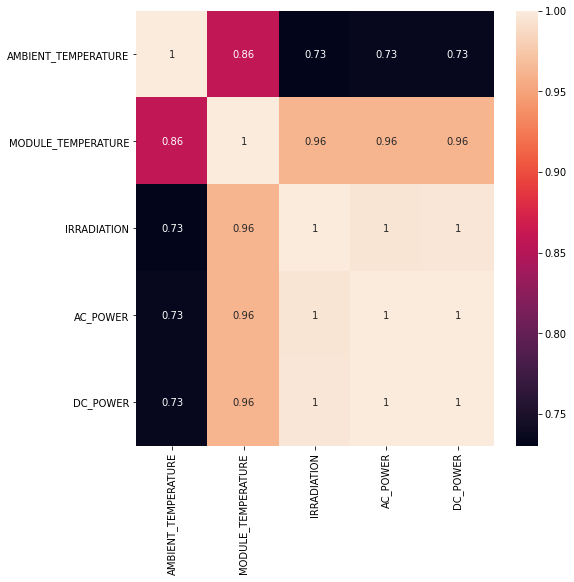

In [15]:
plt.figure(figsize = (8,8))
sns.heatmap(dfs[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'AC_POWER', 'DC_POWER']].corr(),annot=True)

Observations
1. Features are highly correlated. 
2. As expected, AC and DC Power fully corelated, so one can be dropped.
3. Dependent variables- DC/AC power are v.highly correlated with Irradiation

In [13]:
dfs.drop('AC_POWER',axis=1,inplace=True)

In [84]:
dfs[dfs['AC_POWER']!=0]

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
6,2020-05-15 06:30:00,23.98,22.89,0.05,1480.20,15271.16
7,2020-05-15 06:45:00,24.22,24.44,0.10,2790.44,28626.58
8,2020-05-15 07:00:00,24.54,27.19,0.14,4052.67,41345.92
9,2020-05-15 07:15:00,24.82,28.89,0.15,4368.72,44564.24
10,2020-05-15 07:30:00,24.99,29.61,0.15,4275.93,43619.30
...,...,...,...,...,...,...
3031,2020-06-17 17:30:00,24.28,26.86,0.09,2869.84,29492.00
3032,2020-06-17 17:45:00,24.17,25.95,0.07,2021.62,20813.43
3033,2020-06-17 18:00:00,24.13,25.08,0.04,1288.59,13312.01
3034,2020-06-17 18:15:00,24.04,24.07,0.02,719.87,7450.62


Outlier Detection

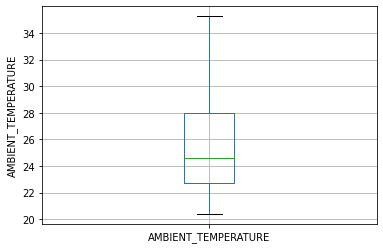

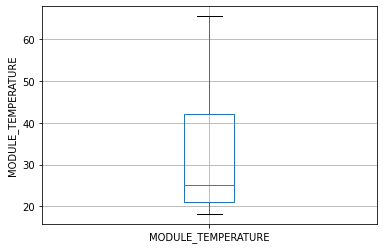

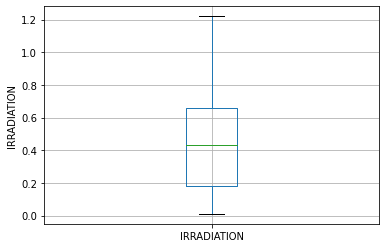

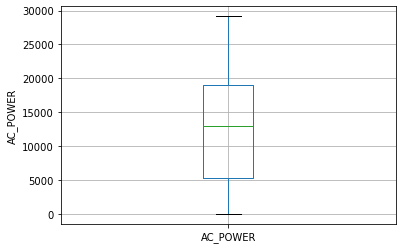

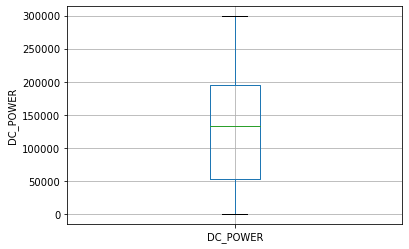

In [85]:
## Ignored zero values 
  
for feature in dfs.columns[1:]:
    dfs[dfs[feature]!=0].boxplot(column = feature)
  #plt.xlabel(feature)
    plt.ylabel(feature)
    plt.show()




  

In [8]:
from prettytable import PrettyTable

for i in dfs.columns[1:]:
  
  myTable = PrettyTable(["Percentile",i]) 
  # Add rows 
  myTable.add_row(['1',round(np.percentile(dfs[i],1),2)])
  myTable.add_row(['10',round(np.percentile(dfs[i],10),2)]) 
  myTable.add_row(['25',round(np.percentile(dfs[i],25),2)]) 
  myTable.add_row(["50",round(np.percentile(dfs[i],50),2)]) 
  myTable.add_row(["75",round(np.percentile(dfs[i],75),2)]) 
  myTable.add_row(["90",round(np.percentile(dfs[i],90),2)]) 
  myTable.add_row(["95",round(np.percentile(dfs[i],95),2)]) 
  myTable.add_row(["99",round(np.percentile(dfs[i],99),2)]) 
  myTable.add_row(["100",round(np.percentile(dfs[i],100),2)]) 

  print(myTable)

  


ModuleNotFoundError: No module named 'prettytable'

## Imputing outliers 

In [48]:
def outlier_imputer(df):
    
    for var in df.columns[1:]:
        
        NinetyNine_percentile = np.percentile(df[var],99)
        df.loc[df[df[var]> NinetyNine_percentile].index.to_list(),var] = NinetyNine_percentile  
    
    return df

In [49]:
dfs = outlier_imputer(dfs)

In [14]:
 NinetyNine_percentile = np.percentile(dfs['AMBIENT_TEMPERATURE'],99)

In [43]:
dfs2.loc[dfs2[dfs2['AMBIENT_TEMPERATURE']>NinetyNine_percentile].index.to_list(),'AMBIENT_TEMPERATURE'] = NinetyNine_percentile#values#,'AMBIENT_TEMPERATURE']

In [44]:
dfs2[dfs2['AMBIENT_TEMPERATURE']>NinetyNine_percentile]

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER


Observations:
1.There seems to be high variation in Module Temperature with each degree rise in Ambient temperature
2.There are not much outliers

Let's check relations using Scatterplots

In [86]:
import plotly.express as px  
fig = px.scatter(dfs[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']],x='AMBIENT_TEMPERATURE',y='MODULE_TEMPERATURE',title='AMBIENT TEMPERATURE vs MODULE TEMPERATURE')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

ModuleNotFoundError: No module named 'plotly'

There seems to be high variation in Module Temperature wrt the Ambient temperature
For Ambient temperature at 27^C, Module temperature is varying from 24-57^C. This indicates the influence of cooling factors like wind, humidity on the module temperature.


In [45]:
fig = px.scatter(dfs[['MODULE_TEMPERATURE','DC_POWER']],x='MODULE_TEMPERATURE',y='DC_POWER',title=' MODULE TEMPERATURE vs DC POWER ')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

In [22]:
## visualize the relationship between the features and the response using scatterplots
sns.pairplot(dfs, x_vars=['IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'], y_vars='AC_POWER', size=7, aspect=0.7)


SyntaxError: invalid syntax (<ipython-input-22-de87fb6828f2>, line 1)

In [87]:
fig = px.scatter(dfs[['IRRADIATION','DC_POWER']],x='IRRADIATION',y='DC_POWER',title=' IRRADIATION vs DC POWER ')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

NameError: name 'px' is not defined

This strong linear relation shows clearly that the Irradiation is the most useful feature for Solar power generation.

In [48]:
fig = px.scatter(dfs[['AMBIENT_TEMPERATURE','IRRADIATION']],x='AMBIENT_TEMPERATURE',y='IRRADIATION',title='AMBIENT TEMPERATURE VS IRRADIATION ')
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.show()

No doubt, Irradiation and Ambient Temperature are correlated but high variance in temperature for each unit of Irradiation implies the influence of other factors too on the temperature.

Factors like wind speed, wind direction, humidity can also be useful for predicting generation.

In [68]:
plt.plot()
dfs[pd.DatetimeIndex(dfs['DATE_TIME']).day == 30]

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
1259,2020-05-30 00:00:00,21.53,20.86,0.0,0.0
1260,2020-05-30 00:15:00,21.49,20.70,0.0,0.0
1261,2020-05-30 00:30:00,21.37,20.53,0.0,0.0
1262,2020-05-30 00:45:00,21.37,20.50,0.0,0.0
1263,2020-05-30 01:00:00,21.32,20.42,0.0,0.0
...,...,...,...,...,...
1350,2020-05-30 22:45:00,23.37,21.33,0.0,0.0
1351,2020-05-30 23:00:00,23.30,21.23,0.0,0.0
1352,2020-05-30 23:15:00,23.27,21.47,0.0,0.0
1353,2020-05-30 23:30:00,23.31,21.47,0.0,0.0


In [69]:

dfs[pd.DatetimeIndex(dfs['DATE_TIME']).day == 30]['MODULE_TEMPERATURE']

1259    20.86
1260    20.70
1261    20.53
1262    20.50
1263    20.42
        ...  
1350    21.33
1351    21.23
1352    21.47
1353    21.47
1354    21.07
Name: MODULE_TEMPERATURE, Length: 96, dtype: float64

In [ ]:
df_plant1["DATE"] = pd.to_datetime(df_plant1["DATE_TIME"]).dt.date.astype(str)
df_plant1["DATE_STR"] = df_plant1["DATE"].astype(str)

In [10]:
dfs['DATE'] = pd.to_datetime(dfs["DATE_TIME"]).dt.date.astype(str)

In [13]:
dfs['TIME'] = pd.to_datetime(dfs['DATE_TIME']).dt.time(astype(str))

NameError: name 'astype' is not defined

In [15]:
date=["2020-05-17"]

In [75]:
?dfs[dfs['DATE'].isin(date)].MODULE_TEMPERATURE

1259    20.86
1260    20.70
1261    20.53
1262    20.50
1263    20.42
        ...  
1350    21.33
1351    21.23
1352    21.47
1353    21.47
1354    21.07
Name: MODULE_TEMPERATURE, Length: 96, dtype: float64

## Import Data 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 

In [4]:
pwd()

'C:\\Users\\cnlt4915\\Desktop\\Akash\\DS'

In [3]:
dfs= pd.read_csv('C:\\Users\\cnlt4915\\Desktop\\Akash\\DS\\RE FOrecast\\dfs (1).csv')

In [5]:
dfs = dfs.iloc[:,1:]

In [6]:
dfs

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER,DC_POWER
0,2020-05-15 01:00:00,24.62,22.17,0.0,0.0,0.0
1,2020-05-15 01:45:00,24.87,23.16,0.0,0.0,0.0
2,2020-05-15 04:15:00,24.35,21.78,0.0,0.0,0.0
3,2020-05-15 04:30:00,24.06,21.85,0.0,0.0,0.0
4,2020-05-15 04:45:00,24.01,22.31,0.0,0.0,0.0
...,...,...,...,...,...,...
3052,2020-06-17 22:45:00,22.15,21.48,0.0,0.0,0.0
3053,2020-06-17 23:00:00,22.13,21.39,0.0,0.0,0.0
3054,2020-06-17 23:15:00,22.01,20.71,0.0,0.0,0.0
3055,2020-06-17 23:30:00,21.97,20.73,0.0,0.0,0.0


In [7]:
dfs2 = dfs.copy()

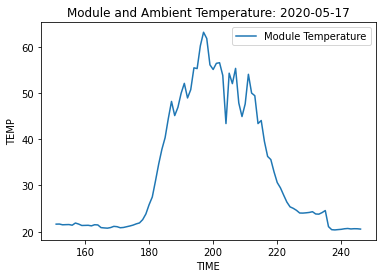

In [16]:
# plt.plot(dfs[dfs['DATE'].isin(date)].AMBIENT_TEMPERATURE,label="Ambient Temperature")
plt.plot(dfs[dfs['DATE'].isin(date)].MODULE_TEMPERATURE,label='Module Temperature')
plt.xlabel('TIME')
plt.ylabel('TEMP')

plt.title("Module and Ambient Temperature: {}" .format(date[0]))
plt.legend()
plt.show()

## Train Test Split 

In [10]:
dfs.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'AC_POWER', 'DC_POWER'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split


X = dfs[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = dfs[['AC_POWER']]


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Standardization of Data

In [13]:
from sklearn import preprocessing 

scaler = preprocessing.StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)


scaled_X_train = pd.DataFrame(scaled_X_train, columns = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
       'IRRADIATION'
                                                        ])
#scaled_y_train =  


## Adding DATE_TIME columns  
#scaled_df = pd.concat([dfs[['DATE_TIME']],scaled_X_train],axis=1)

In [14]:
pd.set_option('Display.max_rows',100)
scaled_X_train.head(100)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,-0.804438,-0.647536,-0.202344
1,-1.044613,-0.808014,-0.598789
2,-0.988963,-0.881399,-0.797011
3,-0.839585,-0.875754,-0.797011
4,0.657118,0.554035,-0.070195
5,-0.593552,-0.260453,-0.103232
6,-1.114909,-0.989460,-0.797011
7,1.371787,1.118531,0.821806
8,0.346648,0.346784,0.161064
9,-1.100264,-0.792692,-0.697900


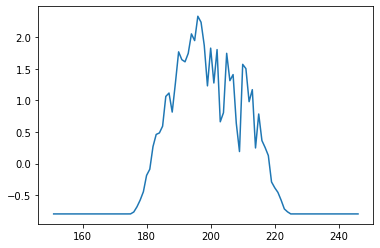

In [50]:
scaled_df['DATE'] = pd.to_datetime(scaled_df["DATE_TIME"]).dt.date.astype(str)
#plt.plot(dfs[dfs['DATE'].isin(date)].DC_POWER,label='Non scaled')
plt.plot(scaled_df[scaled_df['DATE'].isin(date)].DC_POWER,label='scaled')
plt.show()

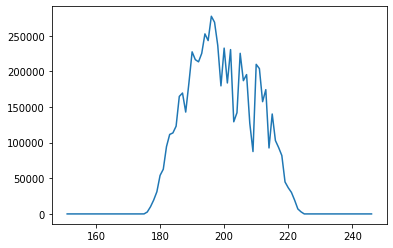

In [51]:
plt.plot(dfs[dfs['DATE'].isin(date)].DC_POWER,label='Non scaled')
plt.show()

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression 

regr = LinearRegression() 
  
regr.fit(scaled_X_train, y_train) 

print(regr.score(scaled_X_test, y_test)) 

0.9914968539254099


In [16]:
#PREDICTION
y_pred = regr.predict(scaled_X_test) 

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [18]:
mse

636524.2877882771

In [117]:
y_test.shape

(612, 1)

In [19]:
y_test

,AC_POWER
1764,10429.42
203,12658.40
1356,0.00
1451,0.00
1577,14206.26
...,...
2775,0.00
2276,0.00
219,4395.60
367,0.00


In [120]:
type(y_test)

pandas.core.frame.DataFrame

## MAPE

In [27]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    count = 0
    mape_list = []
    
    for i in range(len(y_test)):
        
        if y_test[i] ==0:
            mape_list.append(0)
            pass
        
        else:
            mape = np.abs((y_test[i] - y_pred[i]) / y_test[i]) * 100 
            mape_list.append(mape)

        count += 1
    print('Total MAPE is {}'.format(sum(mape_list)/count))
        
    return mape_list

In [330]:
mape_lr = []

In [28]:
MAPE_LIST_LR = mean_absolute_percentage_error(y_test,y_pred)

Total MAPE is [36.87054324]


In [29]:
MAPE_LIST_LR

[array([4.43803125]),
 array([0.08027038]),
 0,
 0,
 array([2.02273239]),
 array([6.417911]),
 array([6.16191279]),
 0,
 0,
 0,
 0,
 array([2.23221097]),
 0,
 0,
 array([21.55164299]),
 array([8.5762927]),
 array([17.80609935]),
 array([5.78246795]),
 0,
 array([7.11590224]),
 0,
 0,
 array([71.87250765]),
 array([7.10631551]),
 0,
 0,
 0,
 0,
 array([7.61206558]),
 0,
 0,
 0,
 array([6.95821513]),
 array([6.81551935]),
 array([18.08832207]),
 0,
 array([1.12138709]),
 0,
 0,
 0,
 array([5.10368458]),
 array([0.84357107]),
 0,
 array([13.04349518]),
 array([1.60746952]),
 0,
 0,
 0,
 0,
 0,
 0,
 array([6.8646101]),
 0,
 array([2.75836168]),
 0,
 array([2.92292246]),
 array([42.71453725]),
 array([10.83472619]),
 0,
 0,
 0,
 0,
 array([10.25045221]),
 0,
 array([6.3187732]),
 array([0.42240657]),
 0,
 array([1.94623137]),
 array([5.62954419]),
 0,
 array([11.54983982]),
 array([3.70682097]),
 0,
 0,
 array([18.1924788]),
 0,
 array([11.5508793]),
 array([1.11432492]),
 0,
 array([6.3602

In [338]:
total_mape

array([35.09741835])

In [291]:
pd.set_option('display.max_rows',300)
pd.concat([y_test.reset_index(drop=True),pd.DataFrame(y_pred,columns=['pred'])],axis=1).head(300)

,DC_POWER,pred
0,106384.74,101867.100433
1,129220.91,129136.132936
2,0.00,1502.039203
3,0.00,1103.496840
4,145043.08,142334.256873
5,194969.02,182615.522192
6,39692.31,42022.764586
7,0.00,865.689900
8,0.00,2013.078466
9,0.00,1633.320501


In [296]:
X_test

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1764,25.70,38.60,0.34
203,33.89,53.81,0.42
1356,23.28,21.42,0.00
1451,22.35,20.20,0.00
1577,26.15,43.07,0.48
...,...,...,...
2775,23.01,22.29,0.00
2276,24.67,22.24,0.00
219,28.75,32.94,0.14
367,23.28,21.92,0.00


In [ ]:
pd.DataFrame(pd.concat(y_test,y_pred)

In [182]:
print("The first five prediction {}".format(y_pred[:5]))
print("The real first five labels {}".format(y_test[:5]))

The first five prediction [[ 0.35155837]
 [ 0.65925372]
 [-0.78093001]
 [-0.78542704]
 [ 0.80817727]]
The real first five labels       DC_POWER
1764  0.402534
203   0.660210
1356 -0.797879
1451 -0.797879
1577  0.838743


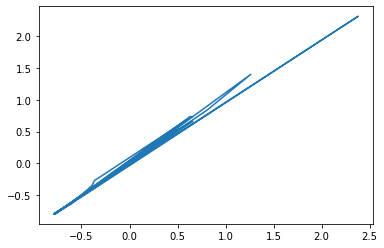

In [183]:
plt.plot(y_pred[:20],y_test[:20])
plt.show()

## Performance Metrics 

In [51]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

NameError: name 'y_test' is not defined

## Mean Squared error

In [241]:
from sklearn.metrics import mean_squared_error

In [244]:
MSE_reg = mean_squared_error(y_pred,y_test)
print(MSE_reg)

0.008308659589587422


In [250]:
MSE_reg_non_scaled = mean_squared_error(y_pred_ns,y_test_ns)
print(MSE_reg_non_scaled,np.sqrt(MSE_reg_non_scaled))

65257219.54332766 8078.194076854533


In [249]:
MSE_rf_ns = mean_squared_error(y_pred_rf_ns,y_test_ns)
print(MSE_rf_ns,np.sqrt(MSE_rf_ns))

43481044.88113523 6594.015838708247


In [247]:
MSE_rf = mean_squared_error(y_pred_rf,y_test)
print(MSE_rf)

0.005504831907089595


## XGBOOST

In [150]:
import xgboost
from xgboost import XGBRegressor


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.base import clone
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [151]:
random_cv.fit(X_train,y_train)

NameError: name 'random_cv' is not defined

## Random Forest

In [21]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1)

rf_randomcv.fit(scaled_X_train, y_train)

NameError: name 'RandomizedSearchCV' is not defined

In [302]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 450,
 'criterion': 'mse'}

In [303]:
rf_randomcv.best_estimator_

RandomForestRegressor(max_depth=450, min_samples_leaf=6, min_samples_split=10,
                      n_estimators=400)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rf_model = RandomForestRegressor(max_depth=450, min_samples_leaf=6, min_samples_split=10,
                      n_estimators=400)

In [24]:
rf_model.fit(scaled_X_train,y_train)

<ipython-input-24-3d6897a7e992>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(scaled_X_train,y_train)


RandomForestRegressor(max_depth=450, min_samples_leaf=6, min_samples_split=10,
                      n_estimators=400)

In [25]:
y_pred_rf = rf_model.predict(scaled_X_test)

In [28]:
mean_absolute_percentage_error(y_test,y_pred_rf)

Total MAPE is 1.1568829936650142


,DATE_TIME,AC_POWER,PREDICTED,MAPE
0,2020-05-15 01:00:00,10.42942,10.606385,0.707861
1,2020-05-15 01:45:00,12.65840,12.740868,0.329872
2,2020-05-15 04:15:00,0.00000,0.000000,0.000000
3,2020-05-15 04:30:00,0.00000,0.000000,0.000000
4,2020-05-15 04:45:00,14.20626,14.657391,1.804523
...,...,...,...,...
607,2020-05-22 13:00:00,0.00000,0.000000,0.000000
608,2020-05-22 13:15:00,0.00000,0.000000,0.000000
609,2020-05-22 13:30:00,4.39560,4.235370,0.640918
610,2020-05-22 13:45:00,0.00000,0.000000,0.000000


In [436]:
pd.DataFrame(y_pred)

,0
0,101867.100433
1,129136.132936
2,1502.039203
3,1103.496840
4,142334.256873
...,...
607,1792.041991
608,1765.160815
609,44274.447736
610,1667.743652


In [80]:
def mean_absolute_percentage_error(y_test, y_pred): 
    
    y_test = y_test.reset_index(drop='True')
    y_pred = pd.DataFrame(y_pred,columns=['PREDICTED'])
    count = 0
    mape_list = []
    
    for i in range(len(y_test)):
        
        if X_test.reset_index(drop=True).loc[i,'IRRADIATION'] == 0:
            
            y_pred.loc[i,'PREDICTED'] = 0
            mape_list.append(0)

            
        else:
            mape = np.abs((y_test.loc[i,'AC_POWER'] - y_pred.loc[i,'PREDICTED']) / 25000) * 100 
            mape_list.append(mape)
        
        mape_report = pd.concat([dfs[['DATE_TIME']].merge(y_test,left_index=True, right_index=True),y_pred,pd.DataFrame(mape_list,columns=['Deviation'])],axis=1)    
        mape_report[['AC_POWER','PREDICTED']] = mape_report[['AC_POWER','PREDICTED']]/1000 
        mape_report['Deviation'] = round(mape_report['Deviation'],2)
        count += 1
    print('MAPE = {}'.format(mean(mape_list)))
    print('No. of blocks with deviation > 15% = {}'.format(mape_report['Deviation'][mape_report['Deviation']>15].count()))
    print(mape_report['Deviation'][mape_report['Deviation']>15])    
    return mape_report

In [77]:
MAPE_REPORT_LR['MAPE'][MAPE_REPORT_LR['MAPE']>15].count()

4

In [43]:
X_test.reset_index(drop=True)['IRRADIATION'][1] 

0.42

In [42]:
X_test

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1764,25.70,38.60,0.34
203,33.89,53.81,0.42
1356,23.28,21.42,0.00
1451,22.35,20.20,0.00
1577,26.15,43.07,0.48
...,...,...,...
2775,23.01,22.29,0.00
2276,24.67,22.24,0.00
219,28.75,32.94,0.14
367,23.28,21.92,0.00


## MAPE Analysis

### Linear Regression 

In [81]:
MAPE_REPORT_LR = mean_absolute_percentage_error(y_test,y_pred)

MAPE = 1.4327786437556589
No. of blocks with deviation > 15% = 4
154    15.20
393    28.61
413    17.81
499    29.75
Name: Deviation, dtype: float64


In [71]:
pd.set_option('display.max_rows',100)
MAPE_REPORT_LR.head(100)

,DATE_TIME,AC_POWER,PREDICTED,MAPE
0,2020-05-15 01:00:00,10.42942,9.966559,1.85
1,2020-05-15 01:45:00,12.65840,12.648239,0.04
2,2020-05-15 04:15:00,0.00000,0.000000,0.00
3,2020-05-15 04:30:00,0.00000,0.000000,0.00
4,2020-05-15 04:45:00,14.20626,13.918905,1.15
5,2020-05-15 05:00:00,19.07323,17.849127,4.90
6,2020-05-15 06:30:00,3.88514,4.124539,0.96
7,2020-05-15 06:45:00,0.00000,0.000000,0.00
8,2020-05-15 07:00:00,0.00000,0.000000,0.00
9,2020-05-15 07:15:00,0.00000,0.000000,0.00


In [62]:

abc = pd.concat([pd.DataFrame(X_test.index),pd.DataFrame(y_pred_rf),X_test[['IRRADIATION']].reset_index(drop=True)],axis=1)#.set_index=['Index','Prediction','Irradiation']

In [64]:
abc.columns=['Index','Prediction','Irradiation']

In [65]:
abc.set_index('Index')

,Prediction,Irradiation
Index,,
1764,10606.385309,0.34
203,12740.867908,0.42
1356,0.000000,0.00
1451,0.000000,0.00
1577,14657.390730,0.48
...,...,...
2775,0.000000,0.00
2276,0.000000,0.00
219,4235.370424,0.14


In [59]:
pd.set_option('display.max_rows',200)
MAPE_REPORT.head(200)

,DATE_TIME,AC_POWER,PREDICTED,MAPE
0,2020-05-15 01:00:00,10.42942,9.966559,1.85
1,2020-05-15 01:45:00,12.65840,12.648239,0.04
2,2020-05-15 04:15:00,0.00000,0.000000,0.00
3,2020-05-15 04:30:00,0.00000,0.000000,0.00
4,2020-05-15 04:45:00,14.20626,13.918905,1.15
5,2020-05-15 05:00:00,19.07323,17.849127,4.90
6,2020-05-15 06:30:00,3.88514,4.124539,0.96
7,2020-05-15 06:45:00,0.00000,0.000000,0.00
8,2020-05-15 07:00:00,0.00000,0.000000,0.00
9,2020-05-15 07:15:00,0.00000,0.000000,0.00


### Random Forest

In [82]:
MAPE_REPORT_RF = mean_absolute_percentage_error(y_test,y_pred_rf)

MAPE = 1.1568829936650142
No. of blocks with deviation > 15% = 2
393    29.82
499    18.79
Name: Deviation, dtype: float64


In [90]:
y_pred

array([[ 9966.5590813 ,  9966.5590813 ,     0.        , ...,
         9966.5590813 ,  9966.5590813 ,  9966.5590813 ],
       [12648.23905391, 12648.23905391,     0.        , ...,
        12648.23905391, 12648.23905391, 12648.23905391],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [ 4339.70597686,  4339.70597686,     0.        , ...,
         4339.70597686,  4339.70597686,  4339.70597686],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [ ]:
pd.DataFrame(y_pred,columns=['PREDICTED']).loc[i,'PREDICTED'] = 0

In [ ]:
for i in range(len(y_test)):
        
        if X_test.reset_index(drop=True).loc[i,'IRRADIATION'] == 0:
            
            y_pred.loc[i,'Predicted'] = 0

In [63]:
X_test.reset_index(drop=True).loc[0,'IRRADIATION']

0.34

In [67]:
y_train[['AC_POWER']].max()

AC_POWER    29150.21
dtype: float64

In [66]:
pd.set_option('display.max_rows()',200)
y_train.head(200)

,AC_POWER
2319,4347.27
2029,1689.53
1373,0.00
351,0.00
2915,7269.28
2897,6105.18
2578,0.00
2064,15057.23
2740,8932.24
2414,1128.40


In [33]:
MAPE_LIST_LR = mean_absolute_percentage_error(y_test,y_pred)

Total MAPE is 36.870543237764785


In [ ]:
y_test

## Creating Copy 

In [49]:
y_test_copy = y_test.copy()
y_pred_copy = y_pred.copy()

In [79]:
X_train_copy = X_train.copy()

In [50]:

y_test = y_test.reset_index(drop=True)
y_pred = pd.DataFrame(y_pred,columns=['Predicted'])
mape_report = pd.concat([dfs[['DATE_TIME']].merge(y_test,left_index=True, right_index=True),y_pred,pd.DataFrame(mape_list,columns=['MAPE'])],axis=1)

In [52]:
pd.concat([dfs[['DATE_TIME']].merge(y_test,left_index=True, right_index=True),y_pred,pd.DataFrame(MAPE_LIST_LR,columns=['MAPE'])],axis=1).head(120)

,DATE_TIME,AC_POWER,Predicted,MAPE
0,2020-05-15 01:00:00,10429.42,9966.559081,4.438031
1,2020-05-15 01:45:00,12658.40,12648.239054,0.080270
2,2020-05-15 04:15:00,0.00,152.525127,0.000000
3,2020-05-15 04:30:00,0.00,111.980057,0.000000
4,2020-05-15 04:45:00,14206.26,13918.905377,2.022732
5,2020-05-15 05:00:00,19073.23,17849.127074,6.417911
6,2020-05-15 06:30:00,3885.14,4124.538939,6.161913
7,2020-05-15 06:45:00,0.00,87.416499,0.000000
8,2020-05-15 07:00:00,0.00,203.322065,0.000000
9,2020-05-15 07:15:00,0.00,165.502554,0.000000


In [47]:
pd.set_option('display.max_rows()',120)
pd.concat([dfs[['DATE_TIME']].merge(y_test,left_index=True, right_index=True),pd.DataFrame(y_pred,columns=['Predicted'],index=y_test.index)],axis=1).head(120)

,DATE_TIME,AC_POWER,Predicted
0,2020-05-15 01:00:00,0.00,176.285041
14,2020-05-15 08:30:00,10995.60,11924.255430
22,2020-05-15 10:30:00,12648.61,13583.823309
25,2020-05-15 11:15:00,15683.71,17136.566941
29,2020-05-15 12:15:00,20477.02,22556.343839
30,2020-05-15 12:30:00,19341.72,18842.385873
32,2020-05-15 13:00:00,12721.87,12505.727733
43,2020-05-15 15:45:00,10543.77,10407.650694
44,2020-05-15 16:00:00,10704.03,10658.815474
45,2020-05-15 16:15:00,9763.46,9765.273078


In [82]:
y_pred[['PREDICTION']] = np.where(X_train.reset_index(drop=True)['IRRADIATION'] == 0,0,y_pred[['PREDICTION']])


<ipython-input-82-d2926d24d5fe>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_pred[['PREDICTION']] = np.where(X_train.reset_index(drop=True)['IRRADIATION'] == 0,0,y_pred[['PREDICTION']])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [81]:
y_pred

array([[ 9966.5590813 ,  9966.5590813 ,     0.        , ...,
         9966.5590813 ,  9966.5590813 ,  9966.5590813 ],
       [12648.23905391, 12648.23905391,     0.        , ...,
        12648.23905391, 12648.23905391, 12648.23905391],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [ 4339.70597686,  4339.70597686,     0.        , ...,
         4339.70597686,  4339.70597686,  4339.70597686],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [40]:
pd.concat([y_test.reset_index(drop=True),pd.DataFrame(y_pred,columns=['Predicted'])],axis=1)

,AC_POWER,Predicted
0,10429.42,9966.559081
1,12658.40,12648.239054
2,0.00,152.525127
3,0.00,111.980057
4,14206.26,13918.905377
...,...,...
607,0.00,182.853898
608,0.00,178.616494
609,4395.60,4339.705977
610,0.00,169.720088


In [458]:
pd.DataFrame(mean_absolute_percentage_error(y_test,y_pred))

Total MAPE is 35.09741835421885


,0
0,4.246511
1,0.065606
2,0.000000
3,0.000000
4,1.867599
...,...
607,0.000000
608,0.000000
609,1.251974
610,0.000000


In [ ]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100


In [381]:
print("The first five prediction {}".format(y_pred_rf[:5]))
print("The real first five labels {}".format(y_test[:5]))

The first five prediction [107843.90394431 129922.44252998      0.              0.
 149570.74929945]
The real first five labels        DC_POWER
1764  106384.74
203   129220.91
1356       0.00
1451       0.00
1577  145043.08


In [203]:
#
rf_df = pd.concat([X_test,pd.DataFrame(y_pred_rf,columns=['y_pred_rf']).set_index(X_test.index)],axis=1)

In [211]:
scaled_df.columns

Index(['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'DC_POWER'],
      dtype='object')

In [213]:
rf_df[['DATE_TIME']] = scaled_df[['DATE_TIME']]
rf_df = rf_df[['DATE_TIME', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'y_pred_rf']]

In [214]:
rf_df

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,y_pred_rf
1764,2020-06-04 08:45:00,0.040307,0.580531,0.338648,0.418930
203,2020-05-17 13:00:00,2.458262,1.808329,0.602288,0.669623
1356,2020-05-31 00:15:00,-0.674156,-0.806291,-0.781821,-0.797879
1451,2020-06-01 01:30:00,-0.948722,-0.904774,-0.781821,-0.797879
1577,2020-06-02 09:00:00,0.173162,0.941363,0.800018,0.891567
...,...,...,...,...,...
2775,2020-06-15 01:00:00,-0.753869,-0.736062,-0.781821,-0.797879
2276,2020-06-09 20:15:00,-0.263783,-0.740099,-0.781821,-0.797879
219,2020-05-17 17:00:00,0.940766,0.123638,-0.320451,-0.310122
367,2020-05-19 06:00:00,-0.674156,-0.765930,-0.781821,-0.797879


In [221]:
y_test

,DC_POWER
1764,0.402534
203,0.660210
1356,-0.797879
1451,-0.797879
1577,0.838743
...,...
2775,-0.797879
2276,-0.797879
219,-0.291965
367,-0.797879


In [219]:
pd.concat([inversed,y_test],axis=1)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,y_pred_rf,DC_POWER
0,25.70,38.60,0.34,1.078378e+05,-0.797879
1,33.89,53.81,0.42,1.300551e+05,NaN
2,23.28,21.42,0.00,-2.764864e-10,NaN
3,22.35,20.20,0.00,-3.055902e-10,NaN
4,26.15,43.07,0.48,1.497246e+05,NaN
...,...,...,...,...,...
3014,NaN,NaN,NaN,NaN,1.395492
3016,NaN,NaN,NaN,NaN,1.249999
3029,NaN,NaN,NaN,NaN,-0.471144
3047,NaN,NaN,NaN,NaN,-0.797879


### Fitting Random Forest on Non scaled data 

In [238]:
rf_model.fit(X_train_ns,y_train_ns)


<ipython-input-238-ace578403964>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_ns,y_train_ns)


RandomForestRegressor(max_depth=450, min_samples_leaf=6, min_samples_split=14,
                      n_estimators=800)

In [239]:
y_pred_rf_ns = rf_model.predict(X_test_ns)

In [242]:
mean_absolute_percentage_error(y_test_ns,y_pred_rf_ns)

<ipython-input-180-3e86df482961>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-180-3e86df482961>:3: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100


nan

In [234]:
X_train_ns,y_train_ns

(      AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
 2319                22.88               23.58         0.18
 2029                22.06               21.59         0.06
 1373                22.25               20.68         0.00
 351                 22.76               20.75         0.00
 2915                27.87               38.48         0.22
 ...                   ...                 ...          ...
 1638                22.70               21.24         0.00
 1095                23.01               20.56         0.00
 1130                21.91               20.37         0.05
 1294                23.96               33.92         0.24
 860                 25.73               40.26         0.50
 
 [2445 rows x 3 columns],
        DC_POWER
 2319   44351.43
 2029   17416.20
 1373       0.00
 351        0.00
 2915   73977.96
 ...         ...
 1638       0.00
 1095       0.00
 1130   17514.78
 1294   75885.00
 860   146843.26
 
 [2445 rows x 1 columns])

In [236]:
type(X_train)

pandas.core.frame.DataFrame

In [237]:
type(X_train_ns)

pandas.core.frame.DataFrame

In [195]:
pd.set_option('display.max_columns',100)
X_test.head(100)

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1764,0.040307,0.580531,0.338648
203,2.458262,1.808329,0.602288
1356,-0.674156,-0.806291,-0.781821
1451,-0.948722,-0.904774,-0.781821
1577,0.173162,0.941363,0.800018
102,1.265522,1.261834,1.261387
2835,0.642582,0.251988,-0.353406
1818,-0.987103,-0.962894,-0.781821
485,0.081640,-0.677942,-0.781821
1436,-0.455684,-0.773195,-0.781821


In [196]:
len(X_test)

612

## Artificial Neural Network 

In [155]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

ModuleNotFoundError: No module named 'keras'

In [ ]:
classifier = Sequential()

classifier.add(Dense(output_dim = 50, init = 'he_uniform', activation))